In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential, Model
import seaborn as sb

In [63]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train_data=train_data.replace(['female','male'],[0,1])
train_data=train_data.replace(['S','C','Q'],[0,1,2])
tarin_data=train_data.fillna(0,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


Text(0.5, 1.0, 'Correlation between features and target(Survived)')

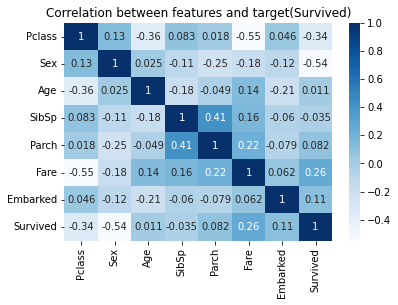

In [65]:
df=pd.DataFrame(data=train_data[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']])
df['Survived']=train_data[['Survived']]
plt.figure()
sb.heatmap(df.corr(),annot=True,cmap=plt.get_cmap('Blues'))
plt.title("Correlation between features and target(Survived)")


In [66]:
Y_train=train_data[['Survived']]
X_train=train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=np.array(Y_train)
X_train=np.array(X_train)
print(X_train.shape,Y_train.shape)

(891, 7) (891, 1)


In [67]:

test_data = pd.read_csv('test.csv')
test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)
X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.read_csv('gender_submission.csv')
Y_test = test[['Survived']]

X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [68]:

print(X_test.shape,Y_test.shape)

(418, 7) (418, 1)


In [69]:
#mlp
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(7,activation='relu'),#input layer with 7 neuron
                                  tf.keras.layers.Dense(16,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
])



In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])



In [71]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
output=model.fit(X_train,Y_train,epochs=200)

(891, 7) (891, 1)
(418, 7) (418, 1)
Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 2.4308 - accuracy: 0.6117
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 1.4024 - accuracy: 0.6016
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 1.0693 - accuracy: 0.5960
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.8238 - accuracy: 0.6094
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7268 - accuracy: 0.6229
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6341
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6397
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6510
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6622
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss:

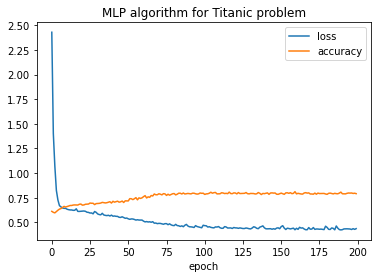

In [72]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('MLP algorithm for Titanic problem')
plt.show()

In [73]:

model.save('titanic.h5')

In [74]:
model=tf.keras.models.load_model('titanic.h5')

In [75]:

model.evaluate(X_test,Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(Y_train.reshape(-1).shape)


14/14 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.9139
(891, 7) (891, 1)
(418, 7) (418, 1)
(891,)


In [76]:
#predict if the passenger survived
pred=[[2,0,34,0,1,54.3900,2]]
y_pred=np.argmax(model.predict(pred))
if y_pred==1:
  print('Survived')
else:
    print('Not Survived')  


Survived


In [77]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)



In [78]:
class KNN:
  
  def __init__(self,k):
    self.k=k

  def fit(self,X_train,Y_train):
    self.X_train=X_train
    self.Y_train=Y_train
    self.num_of_class=len(np.unique(Y_train))

  def nearNeighbors(self,X_test):
    distance=np.sqrt(np.sum((X_test-self.X_train)**2,axis=1))
    near_neighbors=np.argsort(distance)[0:self.k]
    return near_neighbors


  def predict(self,X_test):
    near_neighbors=self.nearNeighbors(X_test)
    y_pred=np.argmax(np.bincount(self.Y_train[near_neighbors])) 
    return y_pred

  def evaluate(self,X_test,Y_test):
    num_of_correct_pred=0
    self.X_test=X_test
    self.Y_test=Y_test
    y=[]
    for i in range(X_test.shape[0]):
      y.append(self.predict(X_test[i,:]))
    for i in range(len(y)):
      if(Y_test[i]==y[i]):
        num_of_correct_pred +=1
    return (num_of_correct_pred /len(Y_test))*100









In [79]:

Y_train=Y_train.reshape(-1)
Y_test=Y_test.reshape(-1)

knn=KNN(5)
knn.fit(X_train,Y_train)

accuracy=knn.evaluate(X_test,Y_test)
print("accuracy of KNN :",accuracy)

accuracy of KNN : 65.55023923444976


In [80]:
class Perceptron:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):

    errors=[]
    iteration=[]
    lr=0.001
    epocs=3
    N=X_train.shape[0]
    self.w=np.random.rand(7,1)
    self.b=np.random.rand(1,1)
    for epoc in range(epocs):
      for j in range(N):
        y_pred=np.matmul(X_train[j],self.w)+self.b
        e=Y_train[j]-y_pred
        self.w+=(lr*(X_train[j].T*e).T)
        self.b+=lr*e
        
        Y_pred=np.matmul(X_train,self.w)+self.b
     

  def predict(self,X_test):
    Y_test_pred=np.matmul(X_train,self.w)+self.b
    Y_test_pred[Y_test_pred>0.5]=1
    Y_test_pred[Y_test_pred<=0.5]=0
    return Y_test_pred

 
  def evaluate(self,X_train,X_test):
    Y_test_pred=np.matmul(X_test,self.w)+self.b
    Y_test_pred[Y_test_pred>0.5]=1
    Y_test_pred[Y_test_pred<=0.5]=0

    num_of_correct_pred=0

    for i in range(len(Y_test)):
      if(Y_test_pred[i]==Y_test[i]):
        num_of_correct_pred+=1
    accuracy=num_of_correct_pred/len(Y_test)*100
    return accuracy
    
  






In [81]:
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_test_pred=perceptron.predict(X_test)


accuracy=perceptron.evaluate(X_train,X_test)
print('accuracy of perceptron ',accuracy)


accuracy of perceptron  61.961722488038276
